In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [34]:
df= pd.read_csv("/Users/tygeurr/Downloads/ViewingActivity.csv")
df = df.loc[df["Supplemental Video Type"].isna()]
df.shape
df.head()

# Cleaning
#Lors de l'encodage de mon df '\xa0' est apparu un peu partout dans mes str empechant tout 
# découpage correct donc on le retire

df['Title'] = df['Title'].str.replace('\xa0', ' ')
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df['Duration'] = pd.to_timedelta(df['Duration'])

In [35]:
df['Title'][1620]

'Le jeu de la dame: Mini-série: Ouvertures (Épisode 1)'

In [4]:
def extract_serie(title):
    # Utiliser une expression régulière pour extraire les informations de la série
    pattern = r'^(.*?): Saison (\d+): (.*?) \(\Épisode (\d+)\)'
    match = re.match(pattern, title)

    if match:
        series_name, season_number, episode_name, episode_number = match.groups()
        return series_name, season_number, episode_name, episode_number
    else:
        return None, None, None, None

def extract_mserie(title):
    # Utiliser une expression régulière pour extraire les informations de la mini-série
    pattern = r'^(.*?): Mini-série: (.*?)(?: \((Épisode \d+)\))?$'
    match = re.match(pattern, title)

    if match:
        series_name, episode_name, episode_number = match.groups()
        return series_name, episode_name, episode_number
    else:
        return None, None, None

In [5]:
def trier(df):
    # Créez la colonne 'Type' pour classifier les contenus
    df['Type'] = ''
    for index, row in df.iterrows():
        titre = row['Title']
        # Identifiez le type (Série, Mini-Série ou Film)
        if 'Saison' in titre:  # Donc il s'agit d'une série
            df.at[index, 'Type'] = 'Série'
        elif 'Mini-série' in titre:  # Il s'agit d'une mini-série
            df.at[index, 'Type'] = 'Mini-Série'
        else:  # Il s'agit d'un long-métrage
            df.at[index, 'Type'] = 'Film'
    return df


In [ ]:
#df trié contenant tout le contenu complet(pas de teaser/bande annonce/promoshoot etc)
data= trier(df.loc[df["Supplemental Video Type"].isna()])
data.head()

In [38]:
data.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                       timedelta64[ns]
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
Type                                    object
dtype: object

Il n'y a qu'un seul utilisateur qui est Anthony. On peut se passer de la colonne Profile Name
Le contenu a été consommé sur 9 appareils différents


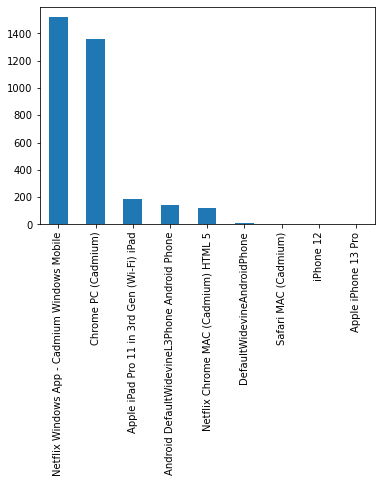

L'utilisateur Anthony a visionné 42 days 22:08:22 de contenu Netflix en tout


In [43]:
#Analyse 
user=data["Profile Name"].unique()[0]
print(f"Il n'y a qu'un seul utilisateur qui est {user}. On peut se passer de la colonne Profile Name")


devices=data["Device Type"].unique()
print(f"Le contenu a été consommé sur {len(devices)} appareils différents")
# Par la suite on peut faire des analyses sur le type de contenu le plus consommé par appareils


#Visualisation 
data['Device Type'].value_counts().plot(kind='bar')
plt.show()

#Temps total de visionnage
time=data['Duration'].sum()
print(f"L'utilisateur {user} a visionné {time} de contenu Netflix en tout")

In [ ]:
#Traitement des données  supplémentaire Partie 1


#DF contenant toutes les séries
series=data[data["Type"]=="Série"]

#Création de nouvelles colonnes 
result = {"Show": [], "Saison": [], "Titre": [], "Numéro": []}
for title in series["Title"]:
    sh,s,t,n=extract_serie(title)
    result["Show"].append(sh)
    result["Saison"].append(s)
    result["Titre"].append(t)
    result["Numéro"].append(n)

#updating du df series
series["Show"]= result["Show"]
series["Saison"]= result["Saison"]
series["Titre"]= result["Titre"]
series["Numéro"]= result["Numéro"]


series= series.drop(["Title","Profile Name", "Supplemental Video Type"], axis=1)
series.head()
print(f"Notre dataframe des séries a {series.shape[0]} lignes et {series.shape[1]} colonnes")

In [ ]:
#Traitement des données Partie 2

mseries= data[data["Type"]=="Mini-Série"]

#Création de nouvelles colonnes 
result = {"Show": [], "Titre": [], "Épisode": []}
for title in mseries["Title"]:
    sh,t,n=extract_mserie(title)
    result["Show"].append(sh)
    result["Titre"].append(t)
    result["Épisode"].append(n)
    
#updating du df mseries

mseries["Show"]= result["Show"]
mseries["Titre"]= result["Titre"]
mseries["Episode"]= result["Épisode"]

mseries = mseries.drop(["Title","Profile Name", "Attributes", "Supplemental Video Type"], axis=1)
mseries.head(10)

In [27]:
#Traitement de la data partie 3

#df contenant tous les long-métrages
films=data[data["Type"]=="Film"]

#traitements suivants??????
films= films.drop(["Profile Name", "Supplemental Video Type"], axis=1)
films.shape


#Modifs supp: Ajoutez des tags

(220, 9)